# Diagonal Diffusion Curvature with Non-lazy Diffusion
> How many n-cycles are in the graph?

In [98]:
#| default_exp diagonal_curvature
from nbdev.showdoc import *
import numpy as np
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import diffusion_curvature
from diffusion_curvature.datasets import torus
from diffusion_curvature.core import plot_3d, diffusion_matrix, gaussian_kernel
# Reload any changes made to external files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
def diagonal_curvature(X, t = 3, denoise = False, no_laziness = True):
    A = gaussian_kernel(X)
    if no_laziness:
        np.fill_diagonal(A,0)
    Dn1 = np.diag(1/np.sum(A, axis=1))
    P = Dn1 @ A
    Pt = np.linalg.matrix_power(P,t)
    diagonal_ks = Pt.diagonal()
    if denoise:
        diagonal_ks = P @ diagonal_ks
    return diagonal_ks

# Tests

## 1. Without Denoising
The self-return probabilities after only three steps appear unable to discern the curvature of the torus without denoising. It's too affected by local density fluctuations.

In [100]:
X, ks = torus(n=2000)

In [101]:
diagonal_ks = diagonal_curvature(X,t=3,denoise=False)

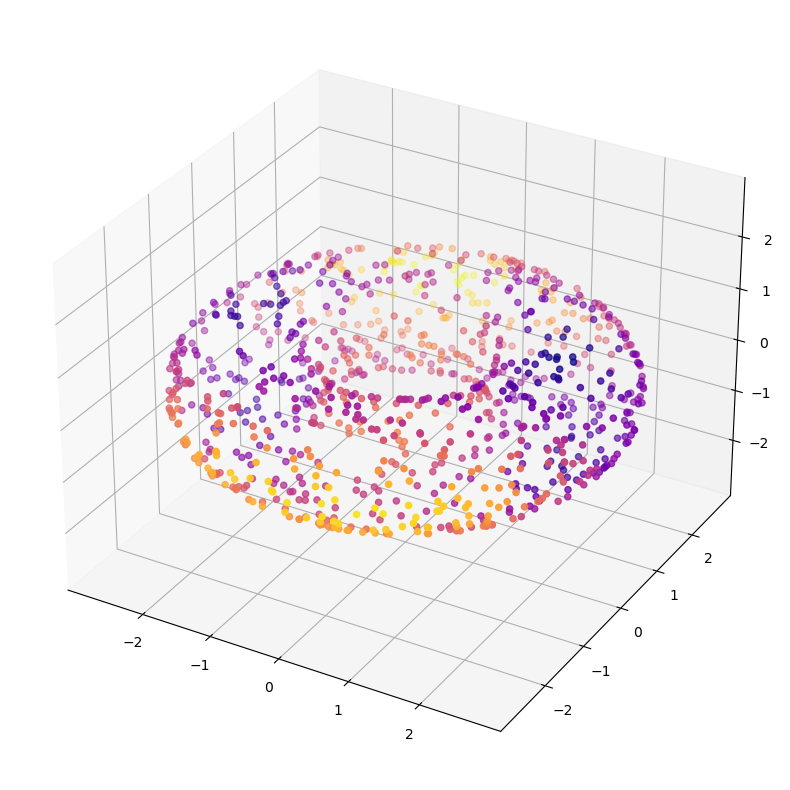

In [102]:
plot_3d(X,diagonal_ks)

However, increase the t value, and we obtain a curious result.

In [103]:
diagonal_ks_high_t = diagonal_curvature(X,t=9,denoise=False)

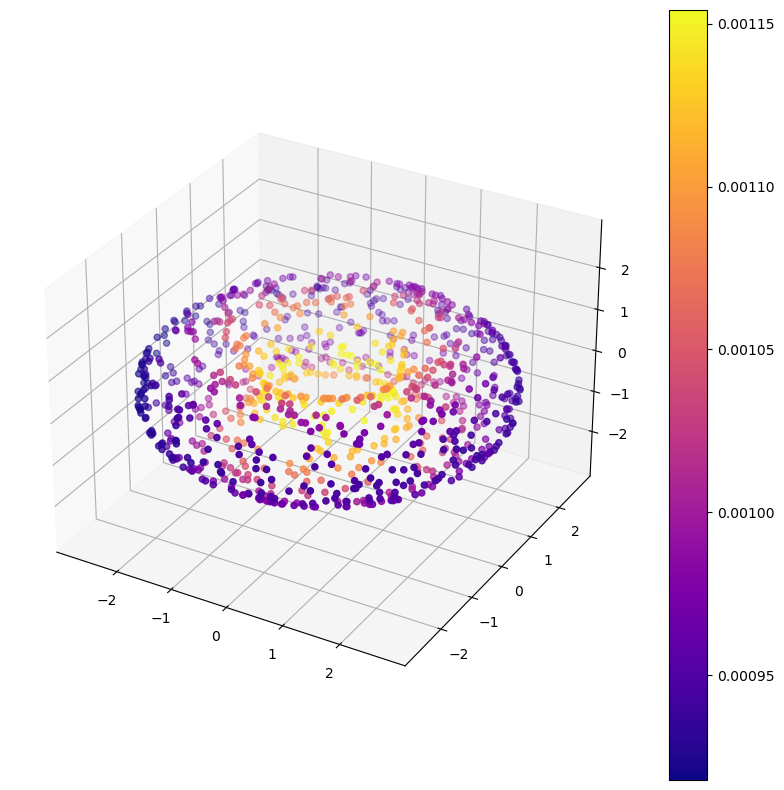

In [104]:
plot_3d(X,diagonal_ks_high_t,colorbar=True)

The differences here are microscopic. My best guess is that by iterating this we've discovered some density

What if we use standard lazy diffusions instead of the nonlazy variant?

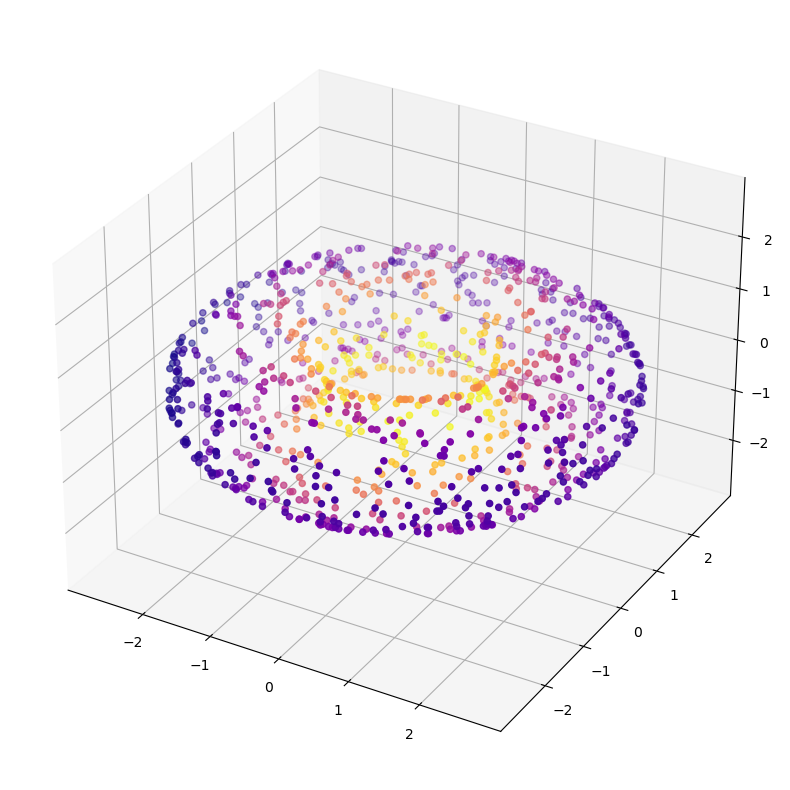

In [105]:
diagonal_ks_lazy = diagonal_curvature(X,t=9,denoise=False,no_laziness=False)
plot_3d(X,diagonal_ks_lazy)

The same pattern persists, suggesting that the aberrant behavior is due considering only the diagonals of the diffusion matrix, or the return probability with a neighborhood size of one, which must be disproportionately affected by density fluctuations.

## 2. With Denoising
Denoising doesn't help for the low t value. There's too much noise, and not enough signal.

In [106]:
diagonal_ks_denoised = diagonal_curvature(X,t=3, denoise=True)

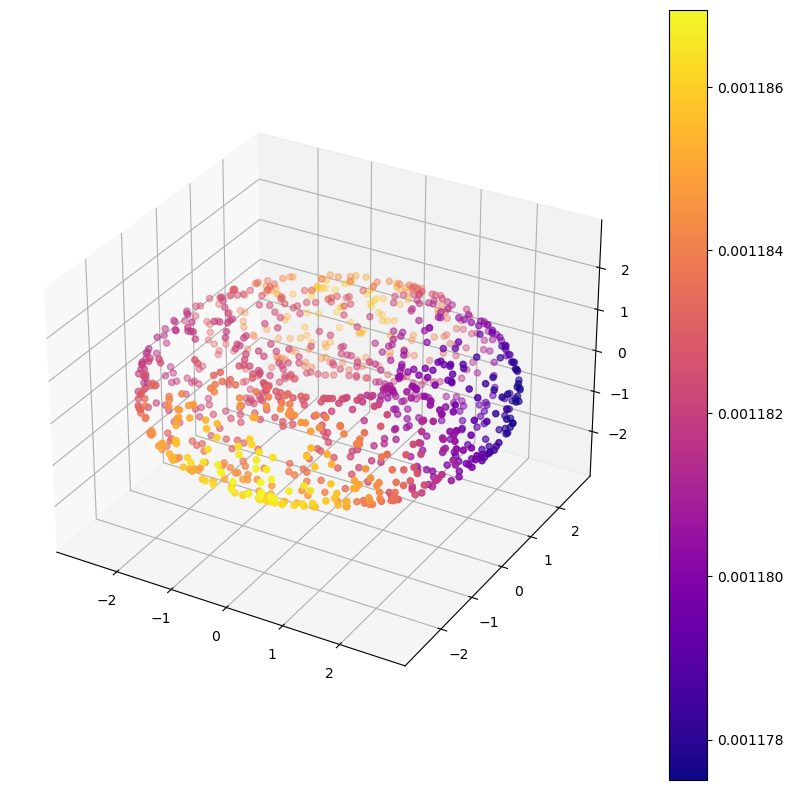

In [107]:
plot_3d(X,diagonal_ks_denoised,colorbar=True)